In [1]:
#import library panda dan NearestNeighbors dari sklearn
import pandas as pd
from sklearn.neighbors import NearestNeighbors
#membaca file csv
df = pd.read_csv('respons2.csv')
#menampilkan data csv (headnya saja)
df.head()

,Timestamp,Siapa nama kamu?,Apa gender kamu?,Seberapa penting fisik pasangan bagi kamu?,Seberapa penting selera humor bagi kamu?,Seberapa penting keromantisan bagi kamu?,Seberapa penting perhatian pacar bagi kamu?,Seberapa penting cara berpikir pacar bagi kamu?,Seberapa penting quality time dengan pacar?,Seberapa penting keseriusan bagi kamu?,Tambahan lain? (tidak wajib diisi)
0,11/1/2020 18:00:05,Citra putri raissa,Cewek,3,5,2,3,5,2,3,"Serius itu tergantung sama pasangan kita juga,..."
1,11/1/2020 18:05:17,Wildan Kamal Allam,Cowok,3,3,4,5,5,5,5,Cariin cewe dong 🙁
2,11/1/2020 18:06:21,Jodohmu,Cowok,4,4,3,4,5,5,4,Seagama
3,11/1/2020 18:06:45,Atika Resti Rahmanda,Cewek,4,5,1,1,5,5,5,NaN
4,11/1/2020 18:08:11,Novia Dewi Maharani,Cewek,2,4,4,5,5,4,5,NaN


In [2]:
#Menghapus Kolom timestamp karena tidak dibutuhkan dan kolom komentar karena tidak punta nilai kuantitatif
df = df.iloc[:, 1:-1]
df.head()

,Siapa nama kamu?,Apa gender kamu?,Seberapa penting fisik pasangan bagi kamu?,Seberapa penting selera humor bagi kamu?,Seberapa penting keromantisan bagi kamu?,Seberapa penting perhatian pacar bagi kamu?,Seberapa penting cara berpikir pacar bagi kamu?,Seberapa penting quality time dengan pacar?,Seberapa penting keseriusan bagi kamu?
0,Citra putri raissa,Cewek,3,5,2,3,5,2,3
1,Wildan Kamal Allam,Cowok,3,3,4,5,5,5,5
2,Jodohmu,Cowok,4,4,3,4,5,5,4
3,Atika Resti Rahmanda,Cewek,4,5,1,1,5,5,5
4,Novia Dewi Maharani,Cewek,2,4,4,5,5,4,5


In [3]:
#Merename kolom supaya mudah dipanggil
df.columns = ['name', 'gender', 'physic', 'humor', 'roman', 'attention', 'logic', 'qt', 'serious']
df.head()

,name,gender,physic,humor,roman,attention,logic,qt,serious
0,Citra putri raissa,Cewek,3,5,2,3,5,2,3
1,Wildan Kamal Allam,Cowok,3,3,4,5,5,5,5
2,Jodohmu,Cowok,4,4,3,4,5,5,4
3,Atika Resti Rahmanda,Cewek,4,5,1,1,5,5,5
4,Novia Dewi Maharani,Cewek,2,4,4,5,5,4,5


In [4]:
df['gender'] = df['gender'].apply(lambda x:0 if x == 'Cowok' else 1)

In [5]:
#Mengklasifikasikan gender laki-laki dan perempuan
df['gender'] = df['gender'].apply(lambda x:0 if x == 'Cowok' else 1)
m_df = df[df['gender'] == 0]
m_sf = m_df.iloc[:, 2:]
f_df = df[df['gender'] == 1]
f_sf = f_df.iloc[:, 2:]
print(f'Rata-rata preference laki-laki:\n{m_sf.mean()}\nRata-rata preference perempuan:\n{f_sf.mean()}')

Rata-rata preference laki-laki:
physic      NaN
humor       NaN
roman       NaN
attention   NaN
logic       NaN
qt          NaN
serious     NaN
dtype: float64
Rata-rata preference perempuan:
physic       3.714286
humor        4.333333
roman        3.690476
attention    4.023810
logic        4.357143
qt           4.047619
serious      4.309524
dtype: float64


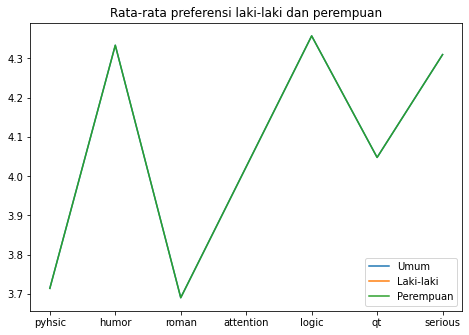

In [6]:
#Mengimport matplotlib untuk menampilkan grafik
import matplotlib.pyplot as plt

#Menentukan nilai axis x dan y
x_ax = ["pyhsic", "humor", "roman", "attention", "logic", "qt", "serious"]
y_ax = [df.physic.mean(), df.humor.mean(), df.roman.mean(), df.attention.mean(), df.logic.mean(), df.qt.mean(), df.serious.mean()]
y_m = [m_df.physic.mean(), m_df.humor.mean(), m_df.roman.mean(), m_df.attention.mean(), m_df.logic.mean(), m_df.qt.mean(), m_df.serious.mean()]
y_f = [f_df.physic.mean(), f_df.humor.mean(), f_df.roman.mean(), f_df.attention.mean(), f_df.logic.mean(), f_df.qt.mean(), f_df.serious.mean()]

#Menentukan atribut grafik
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Rata-rata preferensi laki-laki dan perempuan")

plt.plot(x_ax, y_ax, label="Umum")
plt.plot(x_ax, y_m, label="Laki-laki")
plt.plot(x_ax, y_f, label="Perempuan")

ax.legend()

In [7]:
m_x = m_df.drop(['name', 'gender'], axis=1)
f_x = f_df.drop(['name', 'gender'], axis=1)

In [9]:
m_nbrs = NearestNeighbors(n_neighbors=5).fit(m_x)
f_nbrs = NearestNeighbors(n_neighbors=5).fit(f_x)

ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required.

In [ ]:
x = df.drop(['name', 'gender'], axis=1)

In [ ]:
test = x[df['name'] == 'Citra putri raissa'].values

In [ ]:
_, idx = m_nbrs.kneighbors(test)

In [ ]:
m_df.iloc[idx[0]]['name']